In [1]:
# Data
import numpy as np
import pandas as pd
import os
import csv
import xml.etree.ElementTree as ET
import scipy

# Framework
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# Imaging
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Dicts for classifiers
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE', 5:'BASOPHIL'}
dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}

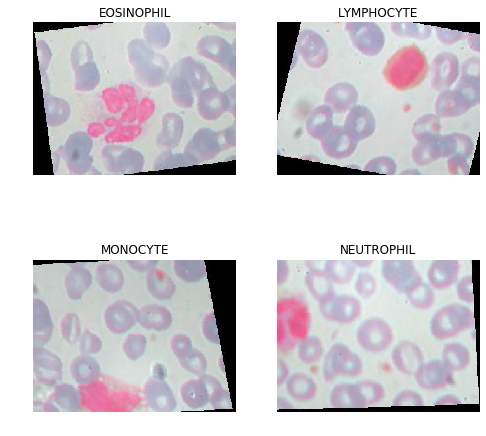

In [3]:
def plotImage(img_dir):
    img = cv2.imread(img_dir)
    plt.imshow(img)


# Demo different cell types
plt.figure(figsize=(8,8))

plt.subplot(221)
image_name = 'blood-cells/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg'
plt.title('EOSINOPHIL')
plt.axis('off')
plotImage(image_name)

plt.subplot(222)
image_name = 'blood-cells/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_204.jpeg'
plt.title('LYMPHOCYTE')
plt.axis('off')
plotImage(image_name)

plt.subplot(223)
image_name = 'blood-cells/dataset2-master/images/TRAIN/MONOCYTE/_0_180.jpeg'
plt.title('MONOCYTE')
plt.axis('off')
plotImage(image_name)

plt.subplot(224)
image_name = 'blood-cells/dataset2-master/images/TRAIN/NEUTROPHIL/_0_292.jpeg'
plt.title('NEUTROPHIL')
plt.axis('off')
plotImage(image_name)

plt.show()

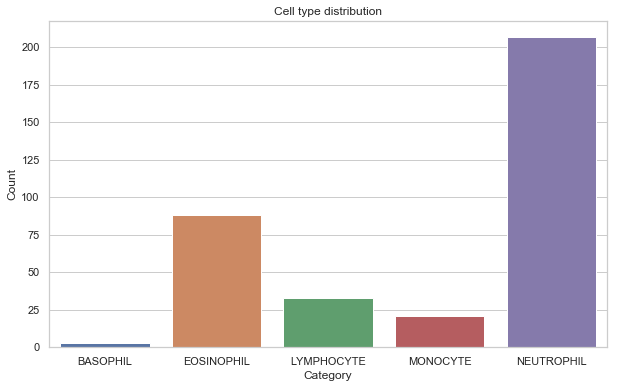

In [4]:
# Data distribution

df = pd.read_csv('blood-cells/dataset2-master/labels.csv')
df = df[['Image','Category']].dropna()
df1 = df[~df.Category.str.contains(",")]
x = df1.groupby('Category').count()

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x = x.index, y = x['Image'])
ax.set(ylabel = 'Count', title = 'Cell type distribution')

plt.show()

In [5]:
# dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE', 5:'BASOPHIL'}
# dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}

from tqdm import tqdm
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical


def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    z = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                label2 = 0
            else:
                label = 5
                label2 = 0
                
                
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                
                if img_file is not None:
                    img_file = resize(img_file, (60, 80, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    z = np.asarray(z)
    return X,y,z

X_train, y_train, z_train = get_data('blood-cells/dataset2-master/images/TRAIN/')
X_test, y_test, z_test = get_data('blood-cells/dataset2-master/images/TEST/')

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

y_trainHot = to_categorical(y_train, num_classes = 5)
y_testHot = to_categorical(y_test, num_classes = 5)
z_trainHot = to_categorical(z_train, num_classes = 2)
z_testHot = to_categorical(z_test, num_classes = 2)



# label1 is Basophil vs Eosinophil vs Lymphocyte vs Monocyte vs Neutrophil
# Label2 is Mononuclear (Basophil + Lymphocyte + Monocyte) vs Polynuclear (Neutrophil + Eosinophil).

print("\nWe don't really care about basophil anyway.\n")
print(dict_characters)
print(dict_characters2)

  0%|          | 0/2499 [00:00<?, ?it/s]/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 623/623 [00:01<00:00, 363.75it/s]



We don't really care about basophil anyway.

{1: 'NEUTROPHIL', 2: 'EOSINOPHIL', 3: 'MONOCYTE', 4: 'LYMPHOCYTE', 5: 'BASOPHIL'}
{0: 'Mononuclear', 1: 'Polynuclear'}


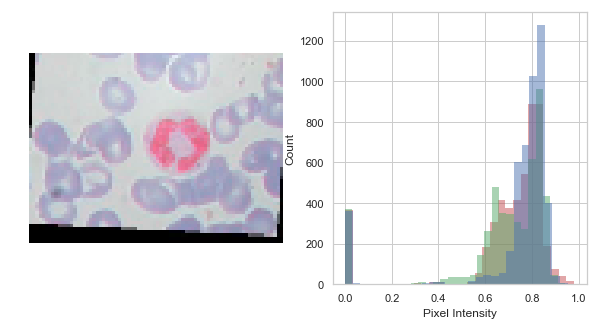

In [6]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);


plotHistogram(X_train[1])